In [95]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [144]:
data_path = 'C:/Users/madle/Documents/GitHub/EyeTracking_Projekt/data/franzi_pilot.tsv'
df = pd.read_csv(data_path, sep='\t')
display(df.columns)
df.head(5)

C:\Users\madle\AppData\Local\Temp\ipykernel_17456\3658398607.py:2: DtypeWarning: Columns (41) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(data_path, sep='\t')


Index(['CNT', 'TIME', 'TIME_TICK', 'FPOGX', 'FPOGY', 'FPOGS', 'FPOGD',
       'FPOGID', 'FPOGV', 'LPOGX', 'LPOGY', 'LPOGV', 'RPOGX', 'RPOGY', 'RPOGV',
       'BPOGX', 'BPOGY', 'BPOGV', 'LPCX', 'LPCY', 'LPD', 'LPS', 'LPV', 'RPCX',
       'RPCY', 'RPD', 'RPS', 'RPV', 'LEYEX', 'LEYEY', 'LEYEZ', 'LPUPILD',
       'LPUPILV', 'REYEX', 'REYEY', 'REYEZ', 'RPUPILD', 'RPUPILV', 'CX', 'CY',
       'CS', 'USER'],
      dtype='object')

,CNT,TIME,TIME_TICK,FPOGX,FPOGY,FPOGS,FPOGD,FPOGID,FPOGV,LPOGX,...,LPUPILV,REYEX,REYEY,REYEZ,RPUPILD,RPUPILV,CX,CY,CS,USER
0,128908,870.07196,28078126502,0.40218,0.43652,869.79742,0.27454,2164,1,0.39049,...,1,0.04047,-0.02649,0.63651,0.00556,1,0.60312,0.43611,0,NaN
1,128909,870.07849,28078191870,0.40226,0.43667,869.79742,0.28107,2164,1,0.38972,...,1,0.04047,-0.02649,0.63651,0.00557,1,0.60312,0.43611,0,START_TRIAL
2,128910,870.08527,28078259577,0.40221,0.43635,869.79742,0.28784,2164,1,0.38556,...,1,0.04047,-0.02649,0.63651,0.00555,1,0.60312,0.43611,0,NaN
3,128911,870.09155,28078322676,0.40216,0.43604,869.79742,0.29413,2164,1,0.38556,...,1,0.04095,-0.02676,0.64398,0.00556,1,0.60312,0.43611,0,FIXATION_LOG
4,128912,870.09863,28078393447,0.40206,0.43562,869.79742,0.30121,2164,1,0.38519,...,1,0.04095,-0.02676,0.64398,0.00556,1,0.60312,0.43611,0,NaN


In [139]:
# drop invalid rows 
df = df[df['FPOGV'] == 1]  # Only valid gaze points

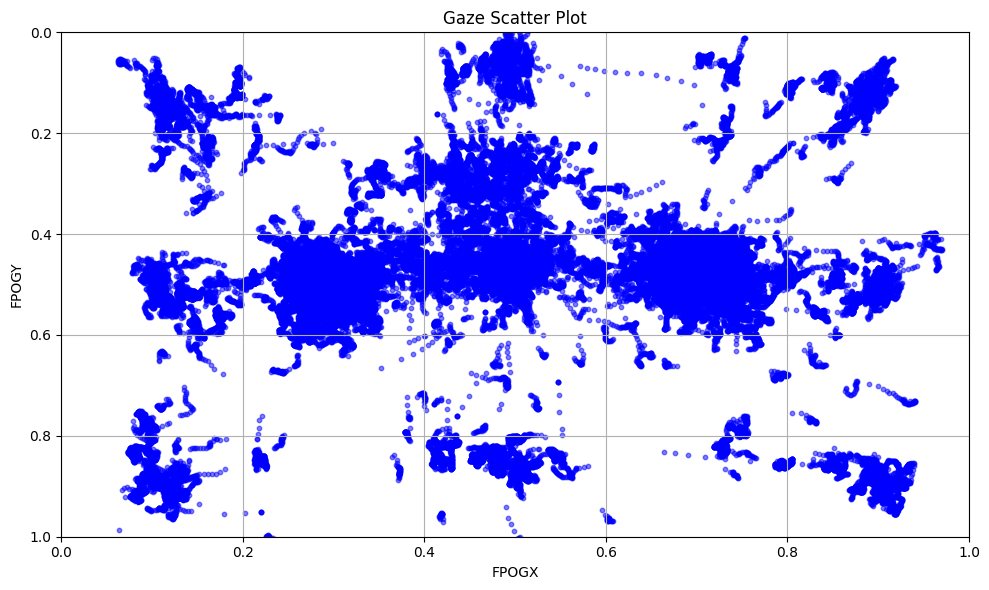

In [117]:
# Scatter plot of gaze positions
plt.figure(figsize=(10, 6))
plt.scatter(df['FPOGX'], df['FPOGY'], alpha=0.5, s=10, c='blue') # Parameter description: The X- and Y-coordinates of the fixation POG, as a fraction of the screen size. (0,0) is top left, (0.5,0.5) is the screen center, and (1.0,1.0) is bottom right.
plt.title('Gaze Scatter Plot')
plt.xlabel('FPOGX')
plt.ylabel('FPOGY')
plt.xlim(0, 1)
plt.ylim(0, 1)
plt.gca().invert_yaxis() #(0,0) is top left, (0.5,0.5) is the screen center, and (1.0,1.0) is bottom right. -> need to invert y-axis
plt.grid(True)
plt.tight_layout()
plt.savefig('gaze_scatter_plot.png', dpi=300, bbox_inches='tight')
plt.show()

KeyboardInterrupt: 

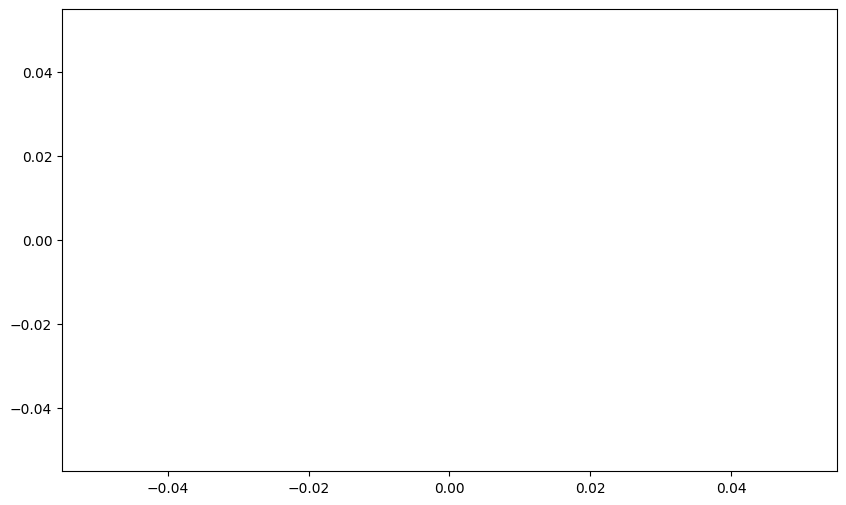

In [36]:
# === 3. Optional: Heatmap of gaze density (2D histogram) ===
plt.figure(figsize=(10, 6))
sns.kdeplot(x=df['FPOGX'], y=df['FPOGY'], fill=True, cmap='coolwarm', bw_adjust=0.1)
plt.title('Gaze Heatmap (FPOG)')
plt.xlabel('FPOGX')
plt.ylabel('FPOGY')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.savefig('heatmap_plot.png', dpi=300, bbox_inches='tight')
plt.show()

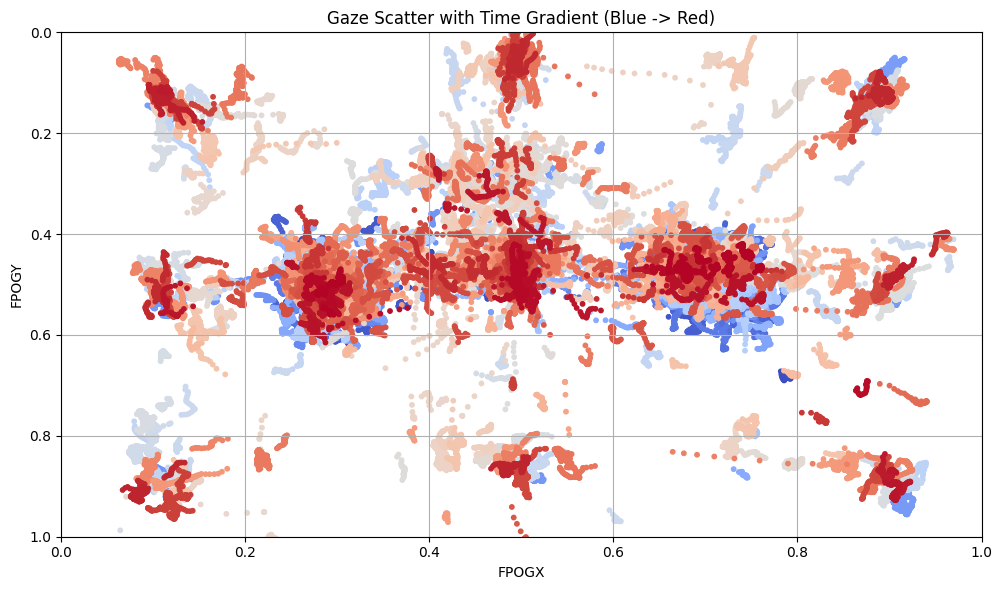

In [118]:
# Normalize time to 0–1 for color mapping
time_norm = (df['TIME'] - df['TIME'].min()) / (df['TIME'].max() - df['TIME'].min())

# Set up colormap from red to blue
colors = plt.cm.coolwarm(time_norm) 

# Plot with time-based color
plt.figure(figsize=(10, 6))
plt.scatter(df['FPOGX'], df['FPOGY'], color=colors, s=10)
plt.title('Gaze Scatter with Time Gradient (Blue -> Red)')
plt.xlabel('FPOGX')
plt.ylabel('FPOGY')
plt.grid(True)
plt.tight_layout()
plt.xlim(0, 1)
plt.ylim(0, 1)
plt.gca().invert_yaxis()

plt.savefig('gaze_scatter_time_plot.png', dpi=300, bbox_inches='tight')
plt.show()

         CNT       TIME    TIME_TICK    FPOGX    FPOGY      FPOGS    FPOGD  \
1895  130803  882.77222  28205129362  0.50467  0.47274  882.55792  0.21429   
1896  130804  882.77869  28205193685  0.50454  0.47243  882.55792  0.22076   
1897  130805  882.78516  28205258394  0.50460  0.47186  882.55792  0.22723   
1898  130806  882.79205  28205327617  0.50465  0.47133  882.55792  0.23413   
1899  130807  882.79852  28205392406  0.50461  0.47059  882.55792  0.24060   
...      ...        ...          ...      ...      ...        ...      ...   
2998  131906  890.16083  28279015215  0.68687  0.43742  888.92145  1.23938   
2999  131907  890.16687  28279075739  0.68699  0.43707  888.92145  1.24542   
3000  131908  890.17474  28279154413  0.68696  0.43706  888.92145  1.25330   
3001  131909  890.18042  28279211399  0.68702  0.43707  888.92145  1.25897   
3002  131910  890.18744  28279281274  0.68704  0.43730  888.92145  1.26599   

      FPOGID  FPOGV    LPOGX  ...  LPUPILV    REYEX    REYEY   

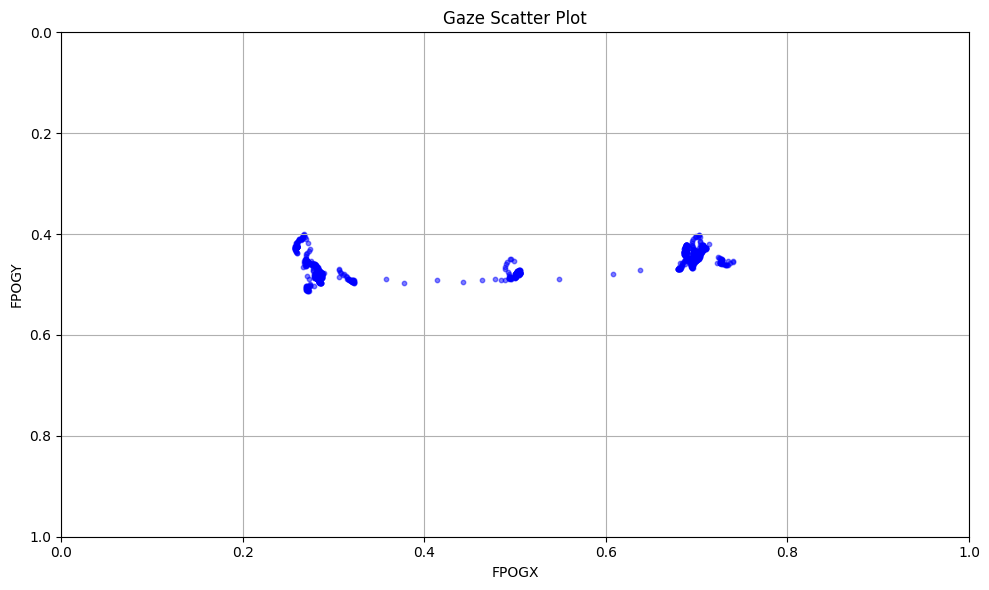

In [145]:
start_index = df[df['USER'] == 'TRIAL 2: BACKGROUND_DOMINANT_L'].index[0]

# === 3. Find the next fixation log ===
# You can change 'fixation' to your actual label (e.g., 'FIXATION_START')
fixation_mask = df.loc[start_index + 1:, 'USER'].str.contains('FIXATION_LOG', case=False, na=False)

# Get index of next fixation
next_fixation_index = fixation_mask[fixation_mask].index.min()

# If no fixation is found, take until end of file
end_index = next_fixation_index if pd.notna(next_fixation_index) else df.shape[0]

# === 4. Extract the data block ===
trial_block = df.loc[start_index:end_index - 1]
print(trial_block)
print(start_index, end_index)

plt.figure(figsize=(10, 6))
plt.scatter(trial_block['FPOGX'], trial_block['FPOGY'], alpha=0.5, s=10, c='blue') # Parameter description: The X- and Y-coordinates of the fixation POG, as a fraction of the screen size. (0,0) is top left, (0.5,0.5) is the screen center, and (1.0,1.0) is bottom right.
plt.title('Gaze Scatter Plot')
plt.xlabel('FPOGX')
plt.ylabel('FPOGY')
plt.xlim(0, 1)
plt.ylim(0, 1)
plt.gca().invert_yaxis() #(0,0) is top left, (0.5,0.5) is the screen center, and (1.0,1.0) is bottom right. -> need to invert y-axis
plt.grid(True)
plt.tight_layout()
plt.savefig('gaze_scatter_plot_TRIAL1.png', dpi=300, bbox_inches='tight')
plt.show()

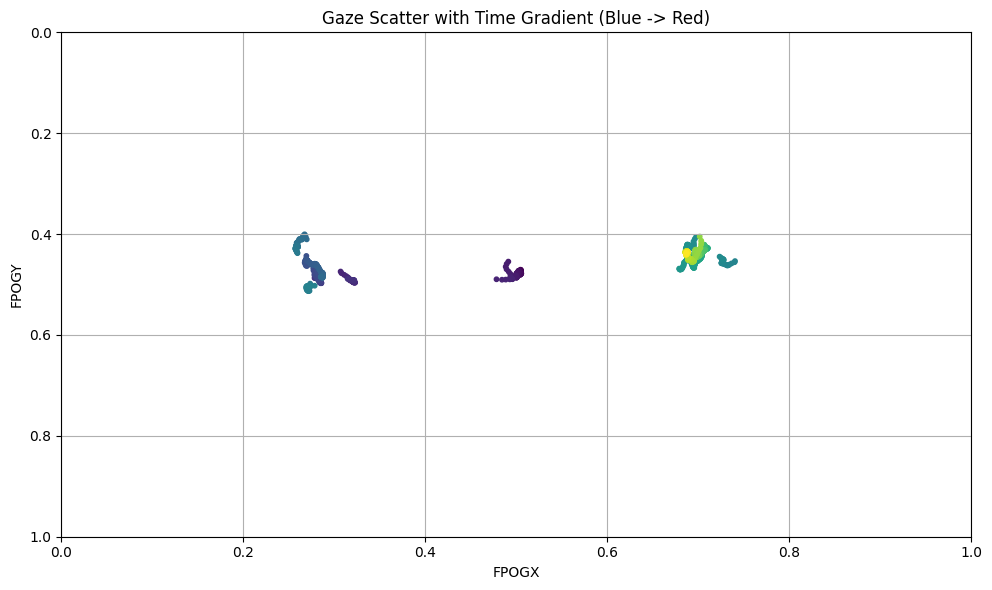

In [ ]:
# Normalize time to 0–1 for color mapping
time_norm = (trial_block['TIME'] - trial_block['TIME'].min()) / (trial_block['TIME'].max() - trial_block['TIME'].min())

# Set up colormap from red to blue
colors = plt.cm.viridis(time_norm) 

# Plot with time-based color
plt.figure(figsize=(10, 6))
plt.scatter(trial_block['FPOGX'], trial_block['FPOGY'], color=colors, s=10)
plt.title('Gaze Scatter with Time Gradient (Blue -> Red)')
plt.xlabel('FPOGX')
plt.ylabel('FPOGY')
plt.grid(True)
plt.tight_layout()
plt.xlim(0, 1)
plt.ylim(0, 1)
plt.gca().invert_yaxis()

plt.savefig('C:/Users/madle/Documents/GitHub/EyeTracking_Projekt/plots/subject1_size_big_R.png', dpi=300, bbox_inches='tight')
plt.show()

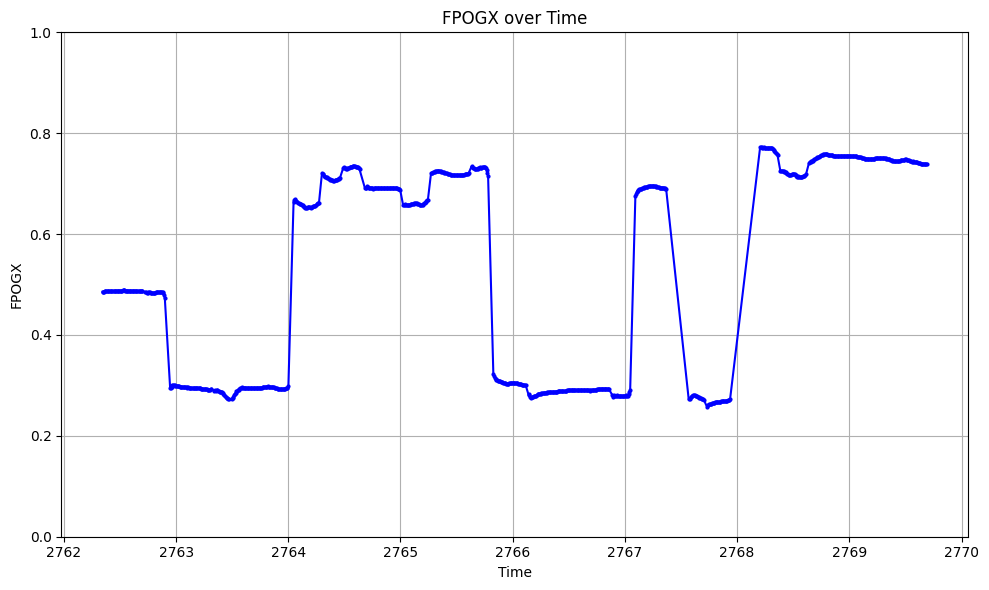

In [141]:
#plot time against FPOGX
plt.figure(figsize=(10, 6))
plt.plot(trial_block['TIME'], trial_block['FPOGX'], marker='o', linestyle='-', color='blue', markersize=2)
plt.title('FPOGX over Time')
plt.xlabel('Time')
plt.ylabel('FPOGX')
plt.grid(True)
plt.tight_layout()
plt.ylim(0, 1)
plt.savefig('C:/Users/madle/Documents/GitHub/EyeTracking_Projekt/plots/subject1_background_dominant_L_FPOGX_over_time.png', dpi=300, bbox_inches='tight')
plt.show()

Total number of trials: 65
                                   USER        TIME
1                           START_TRIAL   870.07849
3                          FIXATION_LOG   870.09155
386                 TRIAL 1: SIZE_BIG_R   872.65729
1498                       FIXATION_LOG   880.11304
1895     TRIAL 2: BACKGROUND_DOMINANT_L   882.77222
...                                 ...         ...
170346                     FIXATION_LOG  2013.18616
176161  TRIAL 62: BACKGROUND_DOMINANT_L  2052.31177
177228                     FIXATION_LOG  2059.46558
178129           TRIAL 63: SIZE_SMALL_L  2065.50757
179273                       STOP_TRIAL  2073.17700

[128 rows x 2 columns]
                                   USER        TIME  TIME_DIFF
1                           START_TRIAL   870.07849    0.00000
3                          FIXATION_LOG   870.09155    0.01306
386                 TRIAL 1: SIZE_BIG_R   872.65729    2.56574
1498                       FIXATION_LOG   880.11304    7.45575
1895     T

C:\Users\madle\AppData\Local\Temp\ipykernel_17456\2346884160.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  trial_entries['TIME_DIFF'] = trial_entries['TIME'].diff().fillna(0)


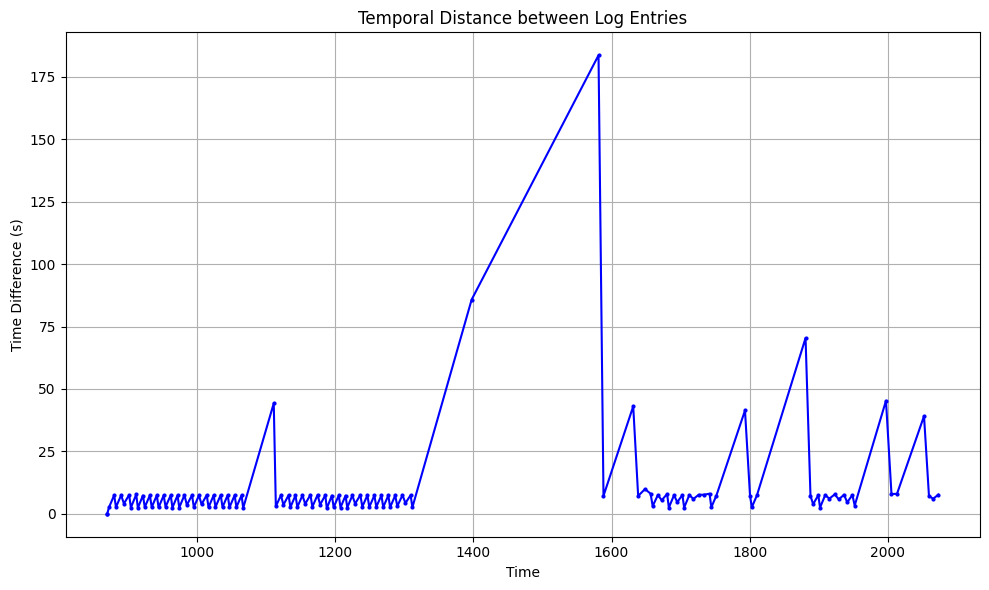

C:\Users\madle\AppData\Local\Temp\ipykernel_17456\2346884160.py:33: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


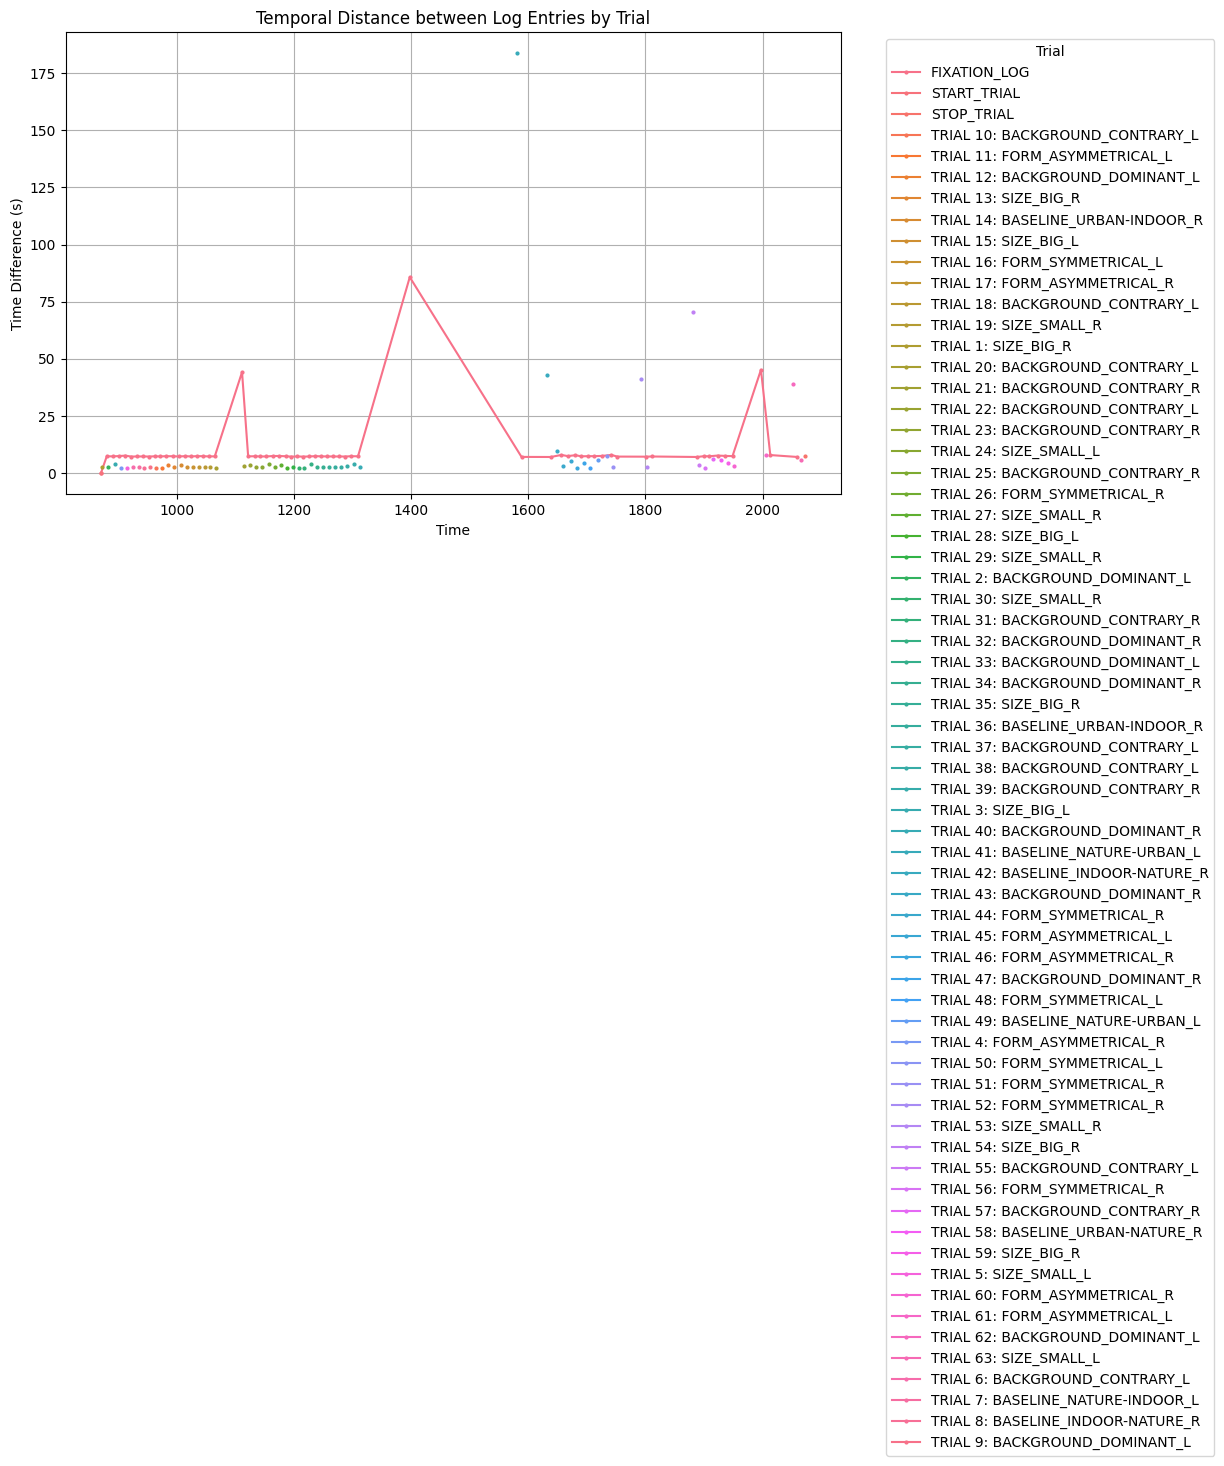

In [146]:
# count all the entries that contain 'TRIAL' in some sort of way and print the count
trial_count = df['USER'].str.contains('TRIAL', case=False, na=False).sum()
print(f'Total number of trials: {trial_count}')
# print the log entries that contain 'TRIAL' or 'FIXATION' in some sort of way
trial_entries = df[df['USER'].str.contains('TRIAL|FIXATION', case=False, na=False)]
print(trial_entries[['USER', 'TIME']])
# calcuate the temporal distance between the log entries
trial_entries['TIME_DIFF'] = trial_entries['TIME'].diff().fillna(0)
print(trial_entries[['USER', 'TIME', 'TIME_DIFF']])

# show the data in a plot
plt.figure(figsize=(10, 6))
plt.plot(trial_entries['TIME'], trial_entries['TIME_DIFF'], marker='o', linestyle
='-', color='blue', markersize=2)
plt.title('Temporal Distance between Log Entries')
plt.xlabel('Time')
plt.ylabel('Time Difference (s)')
plt.grid(True)
plt.tight_layout()
plt.savefig('C:/Users/madle/Documents/GitHub/EyeTracking_Projekt/plots/subject2_background_dominant_L_time_diff_over_time.png', dpi=300, bbox_inches='tight')
plt.show()

#give the plot for each trial a different color
plt.figure(figsize=(10, 6))
colors = sns.color_palette("husl", trial_count)  # Generate a color palette with as many colors as trials
for i, (trial_name, group) in enumerate(trial_entries.groupby('USER')):
    plt.plot(group['TIME'], group['TIME_DIFF'], marker='o', linestyle='-', color=colors[i % len(colors)], markersize=2, label=trial_name)
plt.title('Temporal Distance between Log Entries by Trial')
plt.xlabel('Time')  
plt.ylabel('Time Difference (s)')
plt.grid(True)
plt.legend(title='Trial', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.savefig('C:/Users/madle/Documents/GitHub/EyeTracking_Projekt/plots/subject2_background_dominant_L_time_diff_over_time_by_trial.png', dpi=300, bbox_inches='tight')
plt.show()